# XOR Gate

The XOR gate is a digital logic gate that outputs True (1) only when its two binary inputs are different. If the inputs are the same (both 0 or both 1), the output is False (0).

| A | B | A ⊕ B (XOR) |
|---|---|-------------|
| 0 | 0 | 0 |
| 0 | 1 | 1 |
| 1 | 0 | 1 |
| 1 | 1 | 0 |

XOR can be represented as: 
<div style="text-align: center;">

$A \oplus B = (A \land \lnot B) \lor (\lnot A \land B)$

</div>



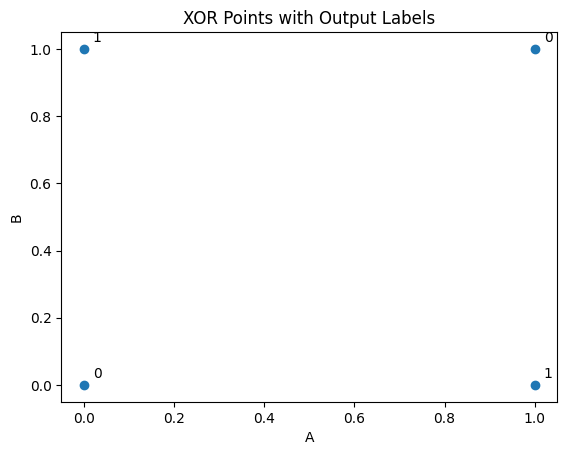

In [35]:
import matplotlib.pyplot as plt
import numpy as np

X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,1,1,0])

plt.scatter(X[:,0], X[:,1])
for i in range(len(X)):
    plt.text(X[i,0] + 0.02, X[i,1] + 0.02, str(y[i]), fontsize=10)

plt.title("XOR Points with Output Labels")
plt.xlabel("A")
plt.ylabel("B")
plt.show()


# Single Layer Perceptron

A Single Layer Perceptron (SLP) is the simplest form of a neural network. It consists of an input layer directly connected to an output neuron, with no hidden layers. The perceptron computes a weighted sum of the inputs and applies an activation function to produce a binary output.

Given inputs $ x_1, x_2, \dots, x_n $, the perceptron computes:
<div style="text-align: center;">

$z = \sum_{i=1}^{n} w_i x_i + b$

</div>
 Then output will be:
 
 <div style="text-align: center;">

$y =
\begin{cases}
1, & z \ge 0 \\
0, & z < 0
\end{cases}
$

</div>
which results in a linear decision boundary

## Why SLP fails for XOR

An SLP can only learn linear decision boundaries. From the above graph of XOR, it is evident that a single line cannot divide the input space such that the two classes are separated correctly. Hence, XOR forms a non-linear decision boundary, requiring at least one hidden layer to model the necessary non-linearity. This demonstrates the need for a Multi Layer Perceptron (MLP).


# Multi-Layer Perceptron

A Multi Layer Perceptron (MLP) is a feedforward neural network that consists of an input layer, one or more hidden layers, and an output layer. Unlike a single-layer perceptron, an MLP uses hidden neurons with non-linear activation functions, enabling it to learn complex, non-linear decision boundaries.

- Input layer: receives input features  
- Hidden layer(s): perform non-linear transformations  
- Output layer: produces the final prediction  

## How the Hidden Layer Solves the XOR Problem

1. Each hidden neuron learns a simple rule that splits the input space in a different way. Individually, these rules are still linear and easy to learn.

2. For the XOR problem, hidden neurons can learn patterns similar to basic logic operations such as OR and NAND. These operations are linearly separable.

3. The non-linear activation function in the hidden layer transforms the outputs of these neurons, allowing the model to represent combinations of these simple rules.

4. The output neuron then combines the hidden neuron outputs to produce the final XOR decision, which is non-linear in the original input space.

## MLP Demonstration Using TensorFlow

TensorFlow is an open-source machine learning framework developed by Google for building, training, and deploying machine learning models. It provides tools to define mathematical computations using data flow graphs and supports automatic differentiation, which makes training neural networks efficient.

TensorFlow can be used at different levels of abstraction, ranging from low-level operations (manual control of weights and gradients) to high-level APIs such as Keras.


In [36]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: C:\Users\raksh\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [1]:
import tensorflow as tf
import numpy as np
# XOR dataset
X = tf.constant([[0.,0.],
                 [0.,1.],
                 [1.,0.],
                 [1.,1.]])

y = tf.constant([[0.],
                 [1.],
                 [1.],
                 [0.]])

C:\Users\raksh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [4]:
# activation functions
def sigmoid(x):
    return tf.math.sigmoid(x)

def tanh(x):
    return tf.math.tanh(x)

def relu(x):
    return tf.maximum(0.0, x)

# initialize weights and biases
def init_weights(hidden_neurons):
    W1 = tf.Variable(tf.random.normal([2, hidden_neurons])) 
    b1 = tf.Variable(tf.zeros([hidden_neurons]))
    W2 = tf.Variable(tf.random.normal([hidden_neurons, 1]))
    b2 = tf.Variable(tf.zeros([1]))
    return W1, b1, W2, b2

# defines the flow of data through the network
def forward(X, W1, b1, W2, b2, activation):
    h = activation(tf.matmul(X, W1) + b1)
    y_hat = sigmoid(tf.matmul(h, W2) + b2)
    return y_hat

# binary cross-entropy loss
def loss(y, y_hat):
    return tf.reduce_mean(
        -(y * tf.math.log(y_hat + 1e-8) +
          (1 - y) * tf.math.log(1 - y_hat + 1e-8))
    )

def train(hidden_neurons, activation, lr, epochs):
    W1, b1, W2, b2 = init_weights(hidden_neurons)
    optimizer = tf.optimizers.SGD(lr)

    for epoch in range(epochs):
        with tf.GradientTape() as tape:
            y_hat = forward(X, W1, b1, W2, b2, activation)
            L = loss(y, y_hat)

        grads = tape.gradient(L, [W1, b1, W2, b2])
        optimizer.apply_gradients(zip(grads, [W1, b1, W2, b2]))

        if epoch % 500 == 0:
            print("Epoch:", epoch, "Loss:", float(L))

    return W1, b1, W2, b2

def predict(X, W1, b1, W2, b2, activation):
    return tf.round(forward(X, W1, b1, W2, b2, activation))


### Activation Functions

Activation functions are mathematical functions applied to the output of a neuron. They decide whether a neuron should be activated and allow a neural network to learn complex patterns.
Without activation functions, a neural network would behave like a single linear model, even if it had multiple layers. Activation functions introduce non-linearity, enabling the network to learn non-linear relationships such as the XOR problem.


#### Sigmoid Function

Maps input values to a range between 0 and 1 and is commonly used in the output layer for binary classification.

In [39]:
W1, b1, W2, b2 = train(
    hidden_neurons=2,
    activation=sigmoid,
    lr=0.1,
    epochs=5000
)

print(predict(X, W1, b1, W2, b2, sigmoid))

Epoch: 0 Loss: 0.6982241868972778
Epoch: 500 Loss: 0.6936284303665161
Epoch: 1000 Loss: 0.6911768913269043
Epoch: 1500 Loss: 0.6819606423377991
Epoch: 2000 Loss: 0.6529725790023804
Epoch: 2500 Loss: 0.5977689623832703
Epoch: 3000 Loss: 0.5398406982421875
Epoch: 3500 Loss: 0.4734130799770355
Epoch: 4000 Loss: 0.29578471183776855
Epoch: 4500 Loss: 0.15637513995170593
tf.Tensor(
[[0.]
 [1.]
 [1.]
 [0.]], shape=(4, 1), dtype=float32)


The loss decreases steadily and converges to a low value, resulting in correct XOR predictions. This shows stable learning and successful non-linear separation.


#### Tanh Function

Maps input values to a range between −1 and 1 and is zero-centered, which can improve learning in some cases.

In [40]:
W1, b1, W2, b2 = train(
    hidden_neurons=2,
    activation=tanh,
    lr=0.1,
    epochs=5000
)

print(predict(X, W1, b1, W2, b2, tanh))

Epoch: 0 Loss: 0.7100385427474976
Epoch: 500 Loss: 0.4404471516609192
Epoch: 1000 Loss: 0.3739932179450989
Epoch: 1500 Loss: 0.36158764362335205
Epoch: 2000 Loss: 0.35672473907470703
Epoch: 2500 Loss: 0.3541804254055023
Epoch: 3000 Loss: 0.35262948274612427
Epoch: 3500 Loss: 0.35159048438072205
Epoch: 4000 Loss: 0.3508480191230774
Epoch: 4500 Loss: 0.3502923250198364
tf.Tensor(
[[0.]
 [1.]
 [0.]
 [1.]], shape=(4, 1), dtype=float32)


Although the loss decreases, it converges to an incorrect classification, indicating convergence to a suboptimal local minimum.


#### ReLU Function

Outputs zero for negative inputs and the input value for positive inputs, making it simple and computationally efficient.

In [41]:
W1, b1, W2, b2 = train(
    hidden_neurons=2,
    activation=relu,
    lr=0.1,
    epochs=5000
)

print(predict(X, W1, b1, W2, b2, relu))

Epoch: 0 Loss: 1.0711133480072021
Epoch: 500 Loss: 0.6931471824645996
Epoch: 1000 Loss: 0.6931471824645996
Epoch: 1500 Loss: 0.6931471824645996
Epoch: 2000 Loss: 0.6931471824645996
Epoch: 2500 Loss: 0.6931471824645996
Epoch: 3000 Loss: 0.6931471824645996
Epoch: 3500 Loss: 0.6931471824645996
Epoch: 4000 Loss: 0.6931471824645996
Epoch: 4500 Loss: 0.6931471824645996
tf.Tensor(
[[0.]
 [0.]
 [0.]
 [0.]], shape=(4, 1), dtype=float32)


The loss plateaus early and produces incorrect outputs, showing that the network fails to learn the XOR relationship due to inactive neurons.


### Learning Rate

In [42]:
W1, b1, W2, b2 = train(
    hidden_neurons=2,
    activation=sigmoid,
    lr=0.001,
    epochs=5000
)

print(predict(X, W1, b1, W2, b2, sigmoid))


Epoch: 0 Loss: 0.7099801301956177
Epoch: 500 Loss: 0.7027167081832886
Epoch: 1000 Loss: 0.6982903480529785
Epoch: 1500 Loss: 0.6955845952033997
Epoch: 2000 Loss: 0.6939162015914917
Epoch: 2500 Loss: 0.69287109375
Epoch: 3000 Loss: 0.6921998262405396
Epoch: 3500 Loss: 0.6917523741722107
Epoch: 4000 Loss: 0.6914388537406921
Epoch: 4500 Loss: 0.6912053227424622
tf.Tensor(
[[1.]
 [0.]
 [1.]
 [0.]], shape=(4, 1), dtype=float32)


The loss decreases very slowly and remains high, leading to incorrect predictions. This indicates slow convergence and underfitting.

In [43]:
W1, b1, W2, b2 = train(
    hidden_neurons=2,
    activation=sigmoid,
    lr=5.0,
    epochs=5000
)

print(predict(X, W1, b1, W2, b2, sigmoid))


Epoch: 0 Loss: 0.7283861637115479
Epoch: 500 Loss: 0.3497527241706848
Epoch: 1000 Loss: 0.34799933433532715
Epoch: 1500 Loss: 0.3474844992160797
Epoch: 2000 Loss: 0.3472406268119812
Epoch: 2500 Loss: 0.34709876775741577
Epoch: 3000 Loss: 0.34700632095336914
Epoch: 3500 Loss: 0.3469413220882416
Epoch: 4000 Loss: 0.3468931317329407
Epoch: 4500 Loss: 0.34685593843460083
tf.Tensor(
[[0.]
 [1.]
 [0.]
 [1.]], shape=(4, 1), dtype=float32)


The loss drops quickly but stabilizes at a suboptimal value, resulting in incorrect classification. This shows unstable training and convergence to a wrong local minimum.


In [44]:
W1, b1, W2, b2 = train(
    hidden_neurons=2,
    activation=sigmoid,
    lr=0.1,
    epochs=5000
)

print(predict(X, W1, b1, W2, b2, sigmoid))


Epoch: 0 Loss: 0.6954972147941589
Epoch: 500 Loss: 0.6935921907424927
Epoch: 1000 Loss: 0.6933265924453735
Epoch: 1500 Loss: 0.6932231187820435
Epoch: 2000 Loss: 0.6931619048118591
Epoch: 2500 Loss: 0.6931028962135315
Epoch: 3000 Loss: 0.6930234432220459
Epoch: 3500 Loss: 0.6928969621658325
Epoch: 4000 Loss: 0.6926718950271606
Epoch: 4500 Loss: 0.6922173500061035
tf.Tensor(
[[1.]
 [1.]
 [0.]
 [0.]], shape=(4, 1), dtype=float32)


The loss decreases steadily to a low value and produces correct XOR outputs, indicating stable and effective learning.


### No of Hidden Neurons

In [45]:
W1, b1, W2, b2 = train(
    hidden_neurons=1,
    activation=sigmoid,
    lr=0.1,
    epochs=5000
)

print(predict(X, W1, b1, W2, b2, sigmoid))


Epoch: 0 Loss: 0.695000171661377
Epoch: 500 Loss: 0.6932476758956909
Epoch: 1000 Loss: 0.693218469619751
Epoch: 1500 Loss: 0.6931991577148438
Epoch: 2000 Loss: 0.6931856274604797
Epoch: 2500 Loss: 0.6931760311126709
Epoch: 3000 Loss: 0.6931690573692322
Epoch: 3500 Loss: 0.6931636333465576
Epoch: 4000 Loss: 0.6931596994400024
Epoch: 4500 Loss: 0.6931567192077637
tf.Tensor(
[[0.]
 [0.]
 [1.]
 [1.]], shape=(4, 1), dtype=float32)


The loss decreases slowly and the model produces incorrect outputs, showing that a single neuron does not have enough capacity to learn the XOR pattern.

In [46]:
W1, b1, W2, b2 = train(
    hidden_neurons=2,
    activation=sigmoid,
    lr=0.1,
    epochs=5000
)

print(predict(X, W1, b1, W2, b2, sigmoid))

Epoch: 0 Loss: 0.6843223571777344
Epoch: 500 Loss: 0.6228939294815063
Epoch: 1000 Loss: 0.5420566201210022
Epoch: 1500 Loss: 0.4752730131149292
Epoch: 2000 Loss: 0.4323013424873352
Epoch: 2500 Loss: 0.4065990447998047
Epoch: 3000 Loss: 0.39106816053390503
Epoch: 3500 Loss: 0.381203830242157
Epoch: 4000 Loss: 0.3745806813240051
Epoch: 4500 Loss: 0.3699083924293518
tf.Tensor(
[[0.]
 [1.]
 [0.]
 [1.]], shape=(4, 1), dtype=float32)


The loss decreases but converges to an incorrect classification, indicating limited capacity and convergence to a suboptimal solution.


In [47]:
W1, b1, W2, b2 = train(
    hidden_neurons=4,
    activation=sigmoid,
    lr=0.1,
    epochs=5000
)

print(predict(X, W1, b1, W2, b2, sigmoid))


Epoch: 0 Loss: 0.7654424905776978
Epoch: 500 Loss: 0.6940469741821289
Epoch: 1000 Loss: 0.6884801387786865
Epoch: 1500 Loss: 0.6722347140312195
Epoch: 2000 Loss: 0.6236927509307861
Epoch: 2500 Loss: 0.5403302907943726
Epoch: 3000 Loss: 0.4462527632713318
Epoch: 3500 Loss: 0.3329845666885376
Epoch: 4000 Loss: 0.22593005001544952
Epoch: 4500 Loss: 0.15297500789165497
tf.Tensor(
[[0.]
 [1.]
 [1.]
 [0.]], shape=(4, 1), dtype=float32)


The loss decreases significantly and the model correctly predicts all XOR outputs, demonstrating sufficient capacity to learn the non-linear decision boundary.


### Epochs

In [48]:
W1, b1, W2, b2 = train(
    hidden_neurons=4,
    activation=sigmoid,
    lr=0.1,
    epochs=200
)

print(predict(X, W1, b1, W2, b2, sigmoid))

Epoch: 0 Loss: 0.6930335760116577
tf.Tensor(
[[1.]
 [0.]
 [1.]
 [0.]], shape=(4, 1), dtype=float32)


Training stops too early, resulting in high loss and incorrect predictions. This indicates underfitting due to insufficient training time.

In [5]:
W1, b1, W2, b2 = train(
    hidden_neurons=4,
    activation=sigmoid,
    lr=0.1,
    epochs=10000
)

print(predict(X, W1, b1, W2, b2, sigmoid))


Epoch: 0 Loss: 0.93425452709198
Epoch: 500 Loss: 0.6260287761688232
Epoch: 1000 Loss: 0.41955476999282837
Epoch: 1500 Loss: 0.21853512525558472
Epoch: 2000 Loss: 0.12545537948608398
Epoch: 2500 Loss: 0.08309832215309143
Epoch: 3000 Loss: 0.06059473007917404
Epoch: 3500 Loss: 0.047027990221977234
Epoch: 4000 Loss: 0.03807557374238968
Epoch: 4500 Loss: 0.03176908940076828
Epoch: 5000 Loss: 0.02710505947470665
Epoch: 5500 Loss: 0.023525167256593704
Epoch: 6000 Loss: 0.020696524530649185
Epoch: 6500 Loss: 0.018409429118037224
Epoch: 7000 Loss: 0.016525495797395706
Epoch: 7500 Loss: 0.014949824661016464
Epoch: 8000 Loss: 0.013615189120173454
Epoch: 8500 Loss: 0.01247243769466877
Epoch: 9000 Loss: 0.011484907940030098
Epoch: 9500 Loss: 0.010624534450471401
tf.Tensor(
[[0.]
 [1.]
 [1.]
 [0.]], shape=(4, 1), dtype=float32)


The loss continues to decrease steadily and the model correctly learns the XOR pattern, showing complete convergence.


In [50]:
W1, b1, W2, b2 = train(
    hidden_neurons=4,
    activation=sigmoid,
    lr=0.1,
    epochs=5000
)

print(predict(X, W1, b1, W2, b2, sigmoid))


Epoch: 0 Loss: 1.1569089889526367
Epoch: 500 Loss: 0.6872591972351074
Epoch: 1000 Loss: 0.6520581245422363
Epoch: 1500 Loss: 0.5710586309432983
Epoch: 2000 Loss: 0.45719727873802185
Epoch: 2500 Loss: 0.3170781433582306
Epoch: 3000 Loss: 0.18946769833564758
Epoch: 3500 Loss: 0.11480417102575302
Epoch: 4000 Loss: 0.07634200155735016
Epoch: 4500 Loss: 0.05521739274263382
tf.Tensor(
[[0.]
 [1.]
 [1.]
 [0.]], shape=(4, 1), dtype=float32)


The model achieves correct predictions with sufficiently low loss, indicating that this number of epochs is adequate for convergence.


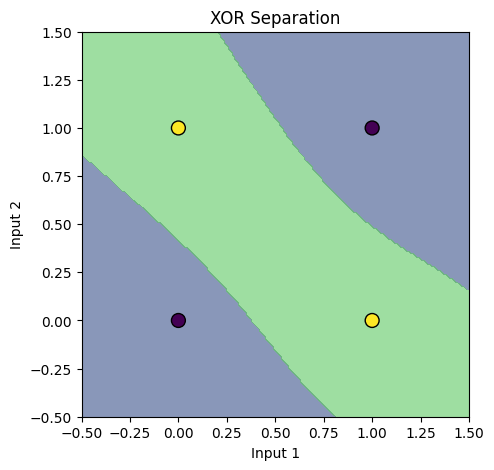

In [51]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-0.5, 1.5, 200)
y = np.linspace(-0.5, 1.5, 200)
xx, yy = np.meshgrid(x, y)

grid = np.c_[xx.ravel(), yy.ravel()]
grid_tf = tf.constant(grid, dtype=tf.float32)

Z = forward(grid_tf, W1, b1, W2, b2, sigmoid)
Z = Z.numpy().reshape(xx.shape)

plt.figure(figsize=(5, 5))
plt.contourf(xx, yy, Z > 0.5, alpha=0.6)
plt.scatter([0,0,1,1], [0,1,0,1],
            c=[0,1,1,0], edgecolors='k', s=100)

plt.xlabel("Input 1")
plt.ylabel("Input 2")
plt.title("XOR Separation")
plt.show()


The plot shows a non-linear decision boundary learned by the MLP that correctly separates the XOR classes. Points belonging to the same class lie in diagonally opposite regions, which are separated by curved boundaries rather than a single straight line. This confirms that the MLP, with optimal hyperparameters, successfully models the non-linear nature of the XOR problem, something a single-layer perceptron cannot achieve.

## MLP Demonstration using Keras

Keras is a high-level deep learning library used to build and train neural networks easily. It provides a simple and user-friendly interface for creating models while handling complex tasks such as backpropagation and optimization internally.

Keras is tightly integrated with TensorFlow and runs on top of it, allowing models to benefit from TensorFlow’s performance and scalability while requiring much less code.


In [52]:
import tensorflow as tf
import numpy as np

X = np.array([[0.,0.],
              [0.,1.],
              [1.,0.],
              [1.,1.]])

y = np.array([[0.],
              [1.],
              [1.],
              [0.]])

model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='sigmoid', input_shape=(2,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
    loss='binary_crossentropy'
)

model.fit(X, y, epochs=5000, verbose=0)

predictions = np.round(model.predict(X))
print(predictions)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
[[0.]
 [1.]
 [1.]
 [0.]]


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


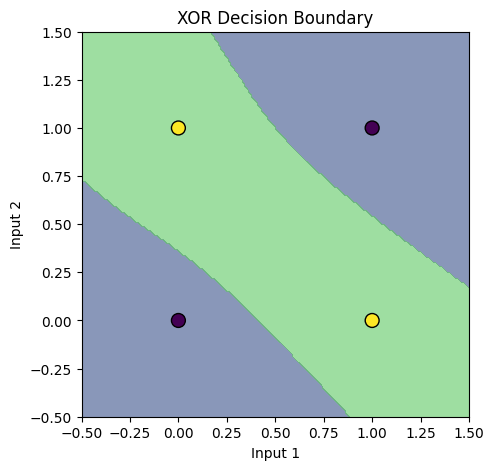

In [53]:
x = np.linspace(-0.5, 1.5, 200)
y = np.linspace(-0.5, 1.5, 200)
xx, yy = np.meshgrid(x, y)

grid = np.c_[xx.ravel(), yy.ravel()]

Z = model.predict(grid)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(5, 5))
plt.contourf(xx, yy, Z > 0.5, alpha=0.6)
plt.scatter([0, 0, 1, 1],
            [0, 1, 0, 1],
            c=[0, 1, 1, 0],
            edgecolors="black",
            s=100)

plt.xlabel("Input 1")
plt.ylabel("Input 2")
plt.title("XOR Decision Boundary")
plt.show()

The plot shows a smooth, non-linear decision boundary that correctly separates the XOR classes. Points belonging to the same class are grouped in diagonally opposite regions, confirming that the MLP has successfully learned the non-linear structure of the XOR problem.

## MLP Demonstration using Pytorch

PyTorch is an open-source deep learning framework used to build and train neural networks. It provides a dynamic computation model, where operations are executed immediately, making it easier to understand, debug, and experiment with models.

PyTorch allows explicit control over the training process, including forward propagation, loss computation, and backpropagation.

In [54]:
%pip install torch

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: C:\Users\raksh\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [55]:
import torch
import torch.nn as nn
import torch.optim as optim

torch.manual_seed(42)

X = torch.tensor([[0., 0.],
                  [0., 1.],
                  [1., 0.],
                  [1., 1.]])

y = torch.tensor([[0.],
                  [1.],
                  [1.],
                  [0.]])

model = nn.Sequential(
    nn.Linear(2, 4),
    nn.Sigmoid(),
    nn.Linear(4, 1)   
)

criterion = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

for epoch in range(5000):
    optimizer.zero_grad()
    logits = model(X)
    loss = criterion(logits, y)
    loss.backward()
    optimizer.step()

with torch.no_grad():
    predictions = torch.round(torch.sigmoid(model(X)))

print(predictions)


tensor([[0.],
        [1.],
        [1.],
        [0.]])


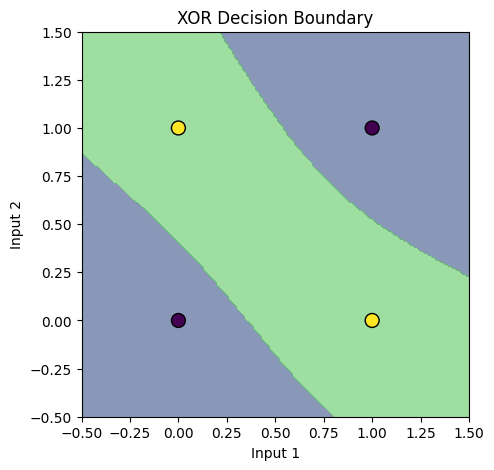

In [56]:
x = np.linspace(-0.5, 1.5, 200)
y = np.linspace(-0.5, 1.5, 200)
xx, yy = np.meshgrid(x, y)

grid = np.c_[xx.ravel(), yy.ravel()]
grid_torch = torch.tensor(grid, dtype=torch.float32)

with torch.no_grad():
    Z = torch.sigmoid(model(grid_torch))
    Z = Z.numpy().reshape(xx.shape)

# Plot
plt.figure(figsize=(5, 5))
plt.contourf(xx, yy, Z > 0.5, alpha=0.6)
plt.scatter([0, 0, 1, 1],
            [0, 1, 0, 1],
            c=[0, 1, 1, 0],
            edgecolors="black",
            s=100)

plt.xlabel("Input 1")
plt.ylabel("Input 2")
plt.title("XOR Decision Boundary")
plt.show()

The plot shows a non-linear decision boundary that correctly separates the XOR classes into diagonally opposite regions. This confirms that the PyTorch-based MLP has successfully learned the XOR relationship, producing results consistent with the TensorFlow and Keras implementations.

## Final Interpretation

The XOR problem cannot be solved using a single linear decision boundary and therefore requires a multi-layer perceptron. By adding a hidden layer with non-linear activation functions, the MLP learns a non-linear decision boundary that correctly separates the XOR classes.

The results are consistent across TensorFlow, Keras, and PyTorch, showing that successful learning depends on model architecture and hyperparameter selection rather than the framework used.
